In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [75]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_wine, load_diabetes, make_blobs

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

from sklearn.svm import SVR, SVC

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.cluster import KMeans

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

import statsmodels.api as sm

from sklearn.tree import export_graphviz
import graphviz 

# 1. Naive Bayes

+ 선형 모델과 유사(LogisticRegression, LinearSVC, ...)
+ 훈련속도는 빠르지만 일반화 성능이 조금 뒤쳐진다.
+ 종류
    - GaussianNB : 연속적인 데이터
    - BernoulliNB : 이산 데이터
    - MultinomialNB : 이산 데이터
    
    
+ 파라미터
    - alpha

### (1) GaussianNB

In [17]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [18]:
model = GaussianNB().fit(X_train, y_train)

In [19]:
preds = model.predict(X_test)

In [20]:
print("정확도 : ", accuracy_score(y_test, preds))

정확도 :  1.0


In [21]:
confusion_matrix(y_test, preds)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

In [23]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### (2) MultinomialNB

+ 영화 리뷰를 이용한 평가 예측(부정/긍정)

In [24]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [25]:
##### type특성을 숫자로 매핑

df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [26]:
df_X = df["movie_review"]
df_y = df["label"]

In [33]:
cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)
X_traincv

encoded_input = X_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [37]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [38]:
##### 총 37개의 단어
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [39]:
model = MultinomialNB().fit(X_traincv, df_y)

In [40]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

In [42]:
test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_X = test_df["movie_review"]
test_y = test_df["label"]

In [43]:
X_testcv = cv.transform(test_X)
preds = model.predict(X_testcv)

In [44]:
accuracy_score(test_y, preds)

1.0

### (3) BernoulliNB

+ 스팸 메일

In [45]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

In [53]:
df = pd.DataFrame(email_list)

In [54]:
df["label"] = df["spam"].map({True:1, False:0})

In [55]:
df_X = df["email title"]
df_y = df["label"]

In [56]:
cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)

In [58]:
model = BernoulliNB().fit(X_traincv, df_y)

In [61]:
test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_X = test_df["email title"]
test_y = test_df["label"]

In [62]:
X_testcv = cv.transform(test_X)
preds = model.predict(X_testcv)

In [63]:
accuracy_score(test_y, preds)

0.8333333333333334

--- 
# 2. K-MEANS

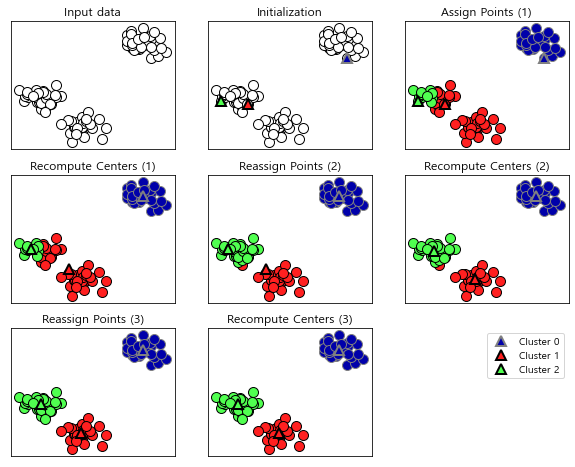

In [64]:
mglearn.plots.plot_kmeans_algorithm()

#### 1) make_blobs 샘플 활용

In [66]:
X, y = make_blobs()

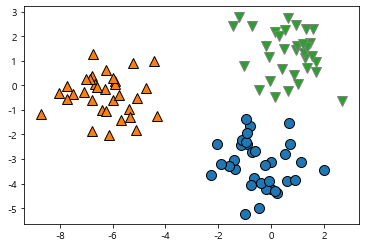

In [67]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [79]:
model = KMeans(n_clusters=5).fit(X)

In [80]:
model.labels_

array([1, 4, 3, 4, 3, 1, 0, 1, 3, 2, 4, 1, 0, 1, 2, 3, 1, 0, 1, 4, 3, 2,
       4, 0, 1, 3, 1, 4, 3, 1, 1, 2, 1, 2, 2, 3, 3, 0, 2, 1, 4, 0, 4, 4,
       4, 3, 4, 2, 1, 1, 2, 1, 4, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 3, 1,
       1, 4, 3, 2, 1, 1, 1, 1, 0, 2, 0, 3, 1, 3, 2, 0, 2, 2, 2, 4, 2, 4,
       1, 2, 1, 4, 4, 1, 4, 2, 2, 3, 2, 2])

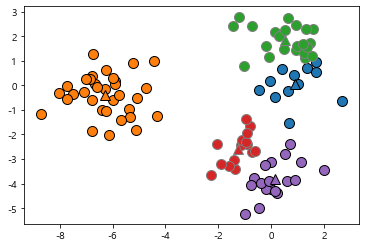

In [81]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
                         [0, 1, 2, 3, 4], markers="^")

#### 2) make_moons 샘플 활용 

In [6]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

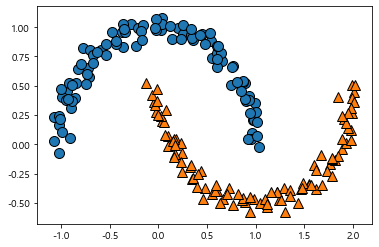

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [8]:
model = KMeans(n_clusters=2).fit(X)

In [9]:
model.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

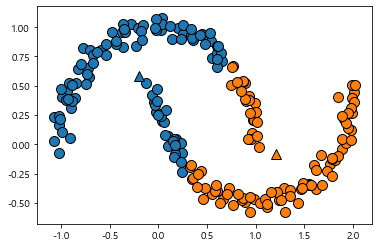

In [10]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
                         [0, 1], markers="^")

In [11]:
preds = model.predict(X)

In [12]:
accuracy_score(y, preds)

0.755

#### 3) iris 샘플 활용

In [14]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

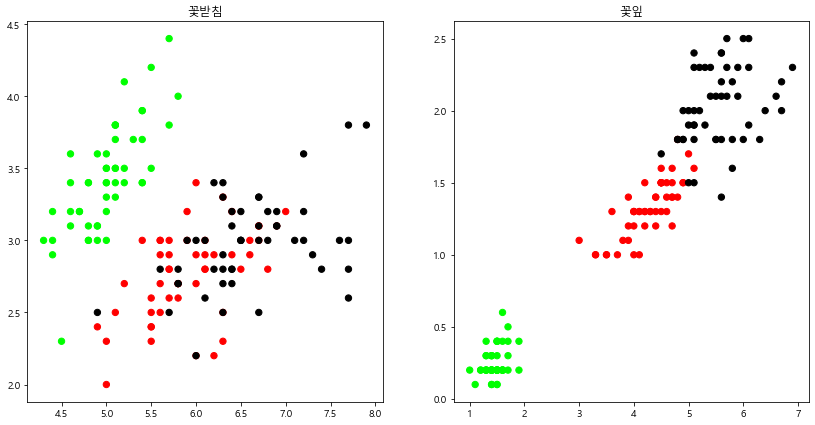

In [16]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [17]:
model = KMeans(n_clusters=3).fit(X)

In [18]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '예측결과')

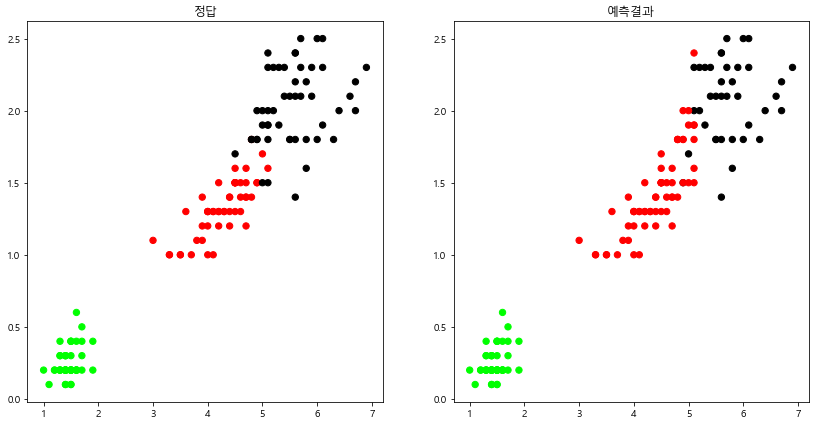

In [21]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("예측결과")

In [22]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [23]:
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

#### 4) 사람의 키와 몸무게를 활용

In [4]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


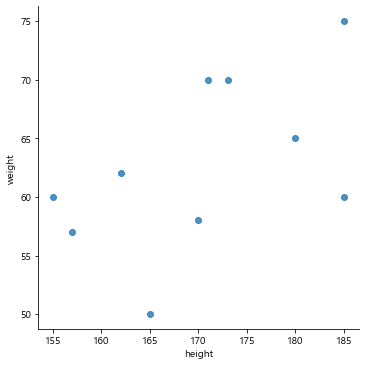

In [5]:
sns.lmplot("height", "weight", data=df, fit_reg=False)

In [6]:
model = KMeans(n_clusters=3).fit(df.values)

In [9]:
df["label"] = model.labels_
df

,height,weight,label
0,185,60,0
1,180,65,0
2,185,75,0
3,165,50,1
4,170,58,1
5,155,60,1
6,157,57,1
7,162,62,1
8,173,70,2
9,171,70,2


C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


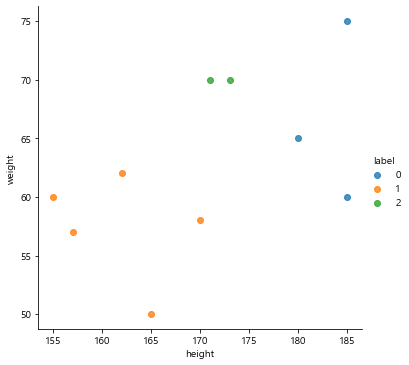

In [10]:
sns.lmplot("height", "weight", data=df, fit_reg=False, hue="label")

---
# 3. 인공 신경망(Artificial Neural Network)


+ 다층 퍼셉트론(Multilayer Perceptron, MLP)
+ 비교적 간단한 분류와 회귀에서 사용
    - ANN을 이용해서 Regression문제와 Classification문제를 해결하는 것이 목표
+ 피드 포워드 신경망, 신경망, 완전 연결 신경망(Fully Connected Neural Network)
+ Artificial Neural Network
    - Single Layer ANN -> Multi Layer ANN -> Convolution Neural Network ...

In [11]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz\bin"

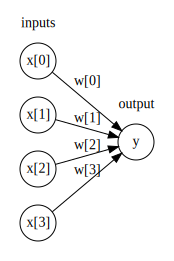

In [12]:
mglearn.plots.plot_logistic_regression_graph()

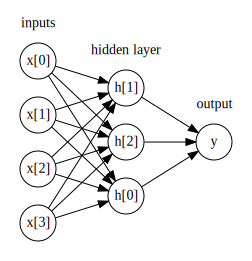

In [13]:
mglearn.plots.plot_single_hidden_layer_graph()

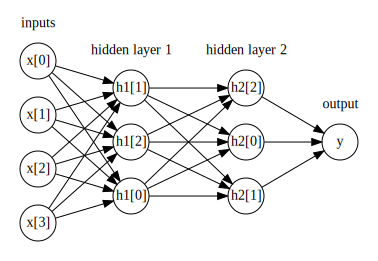

In [14]:
mglearn.plots.plot_two_hidden_layer_graph()

### (1) 퍼셉트론

+ 다수의 신호를 입력으로 받아 하나의 신호로 출력

##### 1) AND gate

In [20]:
def AND(x1, x2):
#     w1, w2, b = 0.5, 0.5, 0.7
#     tmp = x1*w1 + x2*w2
    
#     if tmp <= b:
#         return 0
#     else:
#         return 1

    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [21]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = AND(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 0
0, 1 -> 0
1, 1 -> 1


##### 2) OR gate

In [22]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [23]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = OR(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 1
0, 1 -> 1
1, 1 -> 1


##### 3) XOR gate

In [ ]:
"""
x1    x2   nand   or   xor(nand, or를 and)
--------------------------
0     0      1    0     0     
0     1      1    1     1
1     0      1    1     1
1     1      0    1     0
"""

In [26]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [27]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = NAND(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 1
1, 0 -> 1
0, 1 -> 1
1, 1 -> 0


In [28]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    
    return y

In [29]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = XOR(x1, x2)
    print("{}, {} -> {}".format(x1, x2, y))

0, 0 -> 0
1, 0 -> 1
0, 1 -> 1
1, 1 -> 0


### (2) 인공 신경망을 구현하는 방법

+ Scikit Learn : Perceptron(), MLPClassifier()
+ ML, DL 프레임워크 : Tensorflow, Pytorch, Keras, Theano, ...

##### 1) Perceptron

In [144]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [102]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [103]:
model = Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [104]:
preds = model.predict(X_test)

In [105]:
print(accuracy_score(y_test, preds))

0.8222222222222222


##### 2) MLPClassifier

In [145]:
model = MLPClassifier(max_iter=500, hidden_layer_sizes=(200, 200, 200)).fit(X_train, y_train)

In [146]:
preds = model.predict(X_test)

In [147]:
print(accuracy_score(y_test, preds))

0.9777777777777777


In [148]:
confusion_matrix(y_test, preds)

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 16]], dtype=int64)

In [149]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



# 4. 실습 예제

### 부제 : 타이타닉을 이용한 분류 알고리즘 성능 비교

+ 캐글 제출용
+ https://www.kaggle.com/c/titanic/

### (1) Prepare the data

In [4]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [172]:
train.head()
#test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


### (2) Exploratory Data Analysis

In [156]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [11]:
"""
- Pclass
- Sex
- Sibsp
- Parch
- Embarked
    C=Cherbourg, Q=Queenstown, S=Southampton
- Cabin
"""

def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

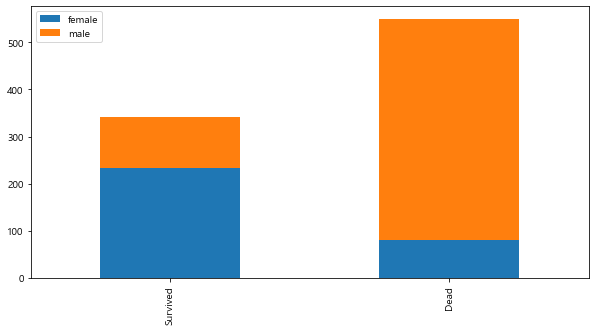

In [158]:
bar_chart("Sex")

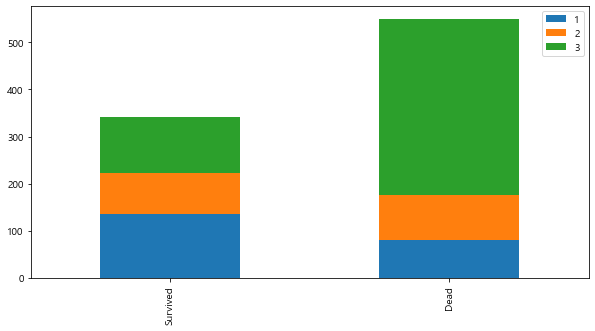

In [159]:
bar_chart("Pclass")

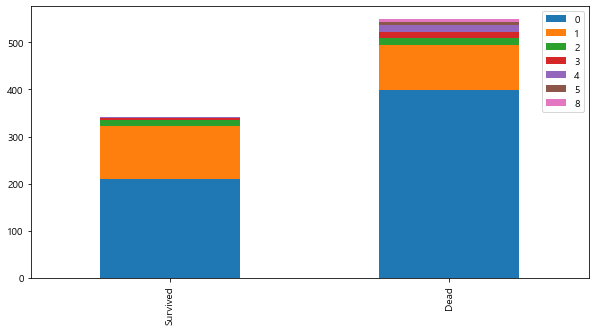

In [160]:
bar_chart("SibSp")

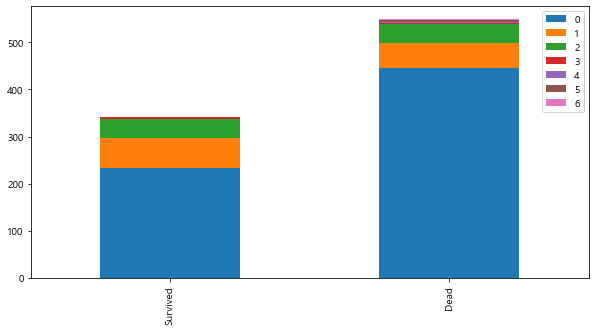

In [161]:
bar_chart("Parch")

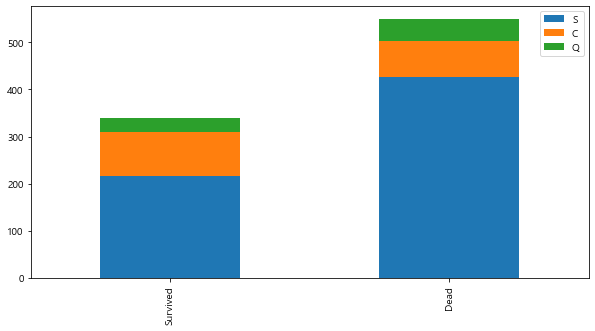

In [162]:
bar_chart("Embarked")

### (3) Feature Engineering

##### 1) Name에서 호칭 추출(Mr, Mrs, Miss)

In [5]:
train_test_data = [train, test]

In [6]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")

In [7]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Don           1
Lady          1
Jonkheer      1
Countess      1
Capt          1
Ms            1
Mme           1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [8]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Mlle":3, "Major":3,
                 "Capt":3, "Mme":3, "Lady":3, "Countess":3, "Don":3, "Jonkheer":3, "Sir":3, "Ms":3,
                "Dona":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [9]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


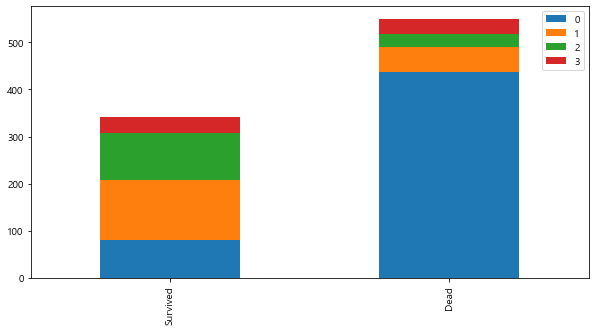

In [12]:
bar_chart("Title")

In [13]:
##### Name 특성을 삭제

train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [14]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

##### 2) Age의 binning

+ child:0, young:1, adult:2, mid:3, senior:4

In [15]:
##### 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [19]:
##### 결측치 처리 : 남자들은 Mr의 평균나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균나이

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [20]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [22]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [24]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2


##### 3) Embarked의 결측치 처리와 인코딩

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [28]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train["Embarked"].fillna("S", inplace=True)

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [31]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0


##### 4) Fare의 결측치 처리와 Binning

+ 결측치는 Pclass의 Fare를 median으로 처리해서 넣어준다.
+ 17 이하이면 0, 18 ~ 30는 1, 31 ~ 100는 2, 그 이상은 3으로 설정 

In [34]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [35]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [36]:
test["Fare"].isnull().sum()

0

In [38]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 100, "Fare"] = 3

In [40]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,female,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,male,4.0,0,0,240276,0.0,NaN,2,0
3,895,3,male,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,female,1.0,1,1,3101298,0.0,NaN,0,2


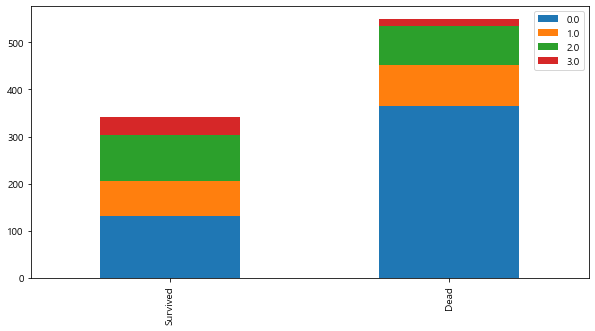

In [41]:
bar_chart("Fare")

##### 5) Cabin 처리

In [42]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
              ..
B4             1
E63            1
E10            1
A19            1
B78            1
Name: Cabin, Length: 147, dtype: int64

In [43]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,0,0


<AxesSubplot:>

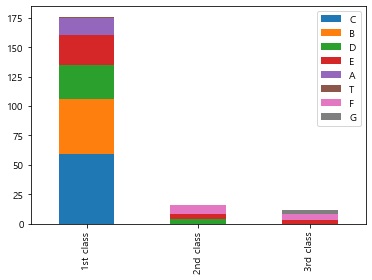

In [48]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3], index=["1st class", "2nd class", "3rd class"])
df.plot(kind="bar", stacked=True)

In [49]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [50]:
train["Cabin"].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [52]:
print(train["Cabin"].isnull().sum())
print(test["Cabin"].isnull().sum())

687
327


In [53]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [54]:
print(train["Cabin"].isnull().sum())
print(test["Cabin"].isnull().sum())

0
0


In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,2.0,0,0


##### 6) 성별 인코딩

In [56]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

In [58]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2


##### 7) 동승자 컬럼 합치기

In [59]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [61]:
train["FamilySize"].value_counts()
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

##### 8) 필요없는 컬럼 삭제 및 모델링 데이터 준비

In [62]:
feature_drop = ["Ticket", "SibSp", "Parch"]

train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)

In [65]:
train.head()
# test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,2
1,2,1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,3,1,2.0,0.0,2.0,0,1,1
3,4,1,1,1,2.0,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0.0,2.0,0,0,1


In [66]:
train = train.drop(["PassengerId"], axis=1)

In [67]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [68]:
print(X.shape, y.shape)

(891, 8) (891,)


In [69]:
X.to_csv("data/titanic/train_data.csv", index=False)
y.to_csv("data/titanic/target.csv", index=False)
test.to_csv("data/titanic/test_data.csv", index=False)

### (4) Modeling

+ KNN
+ DecisionTree
+ RandomForest
+ SVM
+ NaiveBayes
+ NeuralNetwork

In [73]:
X = pd.read_csv("data/titanic/train_data.csv")
y = pd.read_csv("data/titanic/target.csv")

In [74]:
X.head()
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [76]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [81]:
##### KNN

knnclf = KNeighborsClassifier(n_neighbors=26)
score = cross_val_score(knnclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
print(score)
round(np.mean(score)*100, 2)

[0.82222222 0.82022472 0.83146067 0.82022472 0.83146067 0.82022472
 0.82022472 0.79775281 0.83146067 0.82022472]


82.15

In [82]:
##### DecisionTree

dtclf = DecisionTreeClassifier()
score = cross_val_score(dtclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
print(score)
round(np.mean(score)*100, 2)

[0.78888889 0.88764045 0.74157303 0.78651685 0.87640449 0.79775281
 0.79775281 0.79775281 0.75280899 0.80898876]


80.36

In [83]:
##### RandomForest

rfclf = RandomForestClassifier(n_estimators=300)
score = cross_val_score(rfclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
print(score)
round(np.mean(score)*100, 2)

[0.8        0.86516854 0.79775281 0.79775281 0.88764045 0.80898876
 0.82022472 0.80898876 0.7752809  0.83146067]


81.93

In [87]:
##### NaiveBayes

nbclf = BernoulliNB()
score = cross_val_score(nbclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
print(score)
round(np.mean(score)*100, 2)

[0.77777778 0.76404494 0.82022472 0.76404494 0.7752809  0.78651685
 0.75280899 0.7752809  0.80898876 0.83146067]


78.56

In [88]:
##### Neural Network

mlpclf = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 200))
score = cross_val_score(mlpclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
print(score)
round(np.mean(score)*100, 2)

[0.71111111 0.82022472 0.78651685 0.79775281 0.83146067 0.79775281
 0.83146067 0.79775281 0.79775281 0.7752809 ]


79.47

In [89]:
##### SVM

svmclf = SVC()
score = cross_val_score(svmclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
print(score)
round(np.mean(score)*100, 2)

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]


82.6

### (5) Testing

In [91]:
test.head()
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [93]:
model = SVC()
model.fit(X, np.ravel(y))

SVC()

In [94]:
test_data = test.drop("PassengerId", axis=1).copy()

In [96]:
test_data.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [97]:
preds = model.predict(test_data)

In [99]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":preds})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [100]:
submission.to_csv("data/titanic/submission.csv", index=False)